In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
plt.style.use('seaborn')

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive')

<ipython-input-59-b3b3485aec33>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Data
Food_Inspections.csv is the origal data before cleaning.  
Food_Inspections_openrefine.csv is the OpenRefine cleaned data.  
Main OpenRefine changes:
- Massive changes in `DBA Name` and `Facility Type` to merge similar entries.
- Some changes in `AKA Name`, `Address`, `City`, `State`, `Inspection Type`, `Violations`.
- Converted `Inspection Date` to ISO format and added a new column `Inspection Year`.  
**Note**: no rows were droped in Food_Inspections_openrefine.csv

In [60]:
# Load the raw dirty data
df_dirty = pd.read_csv('gdrive/My Drive/Food_Inspections.csv', sep=',')
# df_dirty = pd.read_csv('Food_Inspections.csv', sep=',')

In [61]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    153810 non-null  int64  
 1   DBA Name         153810 non-null  object 
 2   AKA Name         151267 non-null  object 
 3   License #        153795 non-null  float64
 4   Facility Type    149250 non-null  object 
 5   Risk             153744 non-null  object 
 6   Address          153810 non-null  object 
 7   City             153651 non-null  object 
 8   State            153802 non-null  object 
 9   Zip              153712 non-null  float64
 10  Inspection Date  153810 non-null  object 
 11  Inspection Type  153809 non-null  object 
 12  Results          153810 non-null  object 
 13  Violations       123012 non-null  object 
 14  Latitude         153266 non-null  float64
 15  Longitude        153266 non-null  float64
 16  Location         153266 non-null  obje

In [62]:
# Load the OpenRefine cleaned data
df_or = pd.read_csv('gdrive/My Drive/Food_Inspections_openrefine.csv', sep=',')
# df_or = pd.read_csv('Food_Inspections_openrefine.csv', sep=',')

In [63]:
def unique_null_counts(df):
    """
    Get the count of unique values, count of null values, and percentage of missing values in each column of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A merged table containing the null count, unique count, and missing percentage for each column.
    """
    # Calculate the count of unique values in each column
    unique_counts = df.nunique()

    # Calculate the count of null values in each column
    null_counts = df.isnull().sum()

    # Calculate the percentage of missing values in each column
    total_values = df.shape[0]
    missing_percentages = (null_counts / total_values) * 100

    # Create a DataFrame to store the merged results
    merged_table = pd.concat([unique_counts, null_counts, missing_percentages], axis=1)
    merged_table.columns = ['Unique Count', 'Null Count', 'Missing Percentage']

    return merged_table

In [64]:
# Check the raw dirty data
unique_null_counts(df_dirty)

,Unique Count,Null Count,Missing Percentage
Inspection ID,153810,0,0.000000
DBA Name,24685,0,0.000000
AKA Name,23591,2543,1.653339
License #,32850,15,0.009752
Facility Type,447,4560,2.964697
Risk,4,66,0.042910
Address,17017,0,0.000000
City,57,159,0.103374
State,1,8,0.005201
Zip,100,98,0.063715


In [65]:
# Check the OpenRefine cleaned data
unique_null_counts(df_or)

,Unique Count,Null Count,Missing Percentage
Inspection ID,153810,0,0.000000
DBA Name,22342,0,0.000000
AKA Name,23235,2543,1.653339
License #,32850,15,0.009752
Facility Type,195,2802,1.821728
Risk,4,66,0.042910
Address,16830,3,0.001950
City,46,159,0.103374
State,1,0,0.000000
Zip,100,98,0.063715


# Changes in DBA names

In [66]:
df_dirty['DBA Name'].value_counts()[0:20]

SUBWAY                          2142
DUNKIN DONUTS                   1090
MCDONALD'S                       476
7-ELEVEN                         373
MCDONALDS                        278
CHIPOTLE MEXICAN GRILL           256
POTBELLY SANDWICH WORKS LLC      219
CORNER BAKERY CAFE               192
POTBELLY SANDWICH WORKS          184
SPORTSERVICE SOLDIER FIELD       176
DUNKIN DONUTS/BASKIN ROBBINS     172
DOMINO'S PIZZA                   169
AU BON PAIN                      161
SUBWAY SANDWICHES                160
FRESHII                          157
HAROLD'S CHICKEN SHACK           155
WHOLE FOODS MARKET               155
KFC                              146
Subway                           144
SEE THRU CHINESE KITCHEN         130
Name: DBA Name, dtype: int64

In [67]:
df_or['DBA Name'].value_counts()[0:20]

SUBWAY                          3151
DUNKIN DONUTS                   1766
MCDONALD'S                      1763
7-ELEVEN                        1135
STARBUCKS COFFEE                1063
BURGER KING                      613
JEWEL FOOD STORE                 572
WALGREENS                        558
POTBELLY SANDWICH WORKS, LLC     514
HAROLD'S CHICKEN SHACK           473
JIMMY JOHN'S                     358
CHIPOTLE MEXICAN GRILL           358
KENTUCKY FRIED CHICKEN           297
CHURCH'S CHICKEN                 269
WENDY'S                          257
AU BON PAIN                      208
FAMILY DOLLAR                    207
SEE THRU CHINESE KITCHEN         206
PIZZA HUT                        200
CORNER BAKERY CAFE               192
Name: DBA Name, dtype: int64

# Changes in Facility Type

In [68]:
df_dirty['Facility Type'].value_counts()[0:20]

Restaurant                         101230
Grocery Store                       20551
School                               9652
Daycare (2 - 6 Years)                2393
Bakery                               2248
Children's Services Facility         1704
Daycare Above and Under 2 Years      1686
Long Term Care                        906
Catering                              885
Mobile Food Dispenser                 784
Daycare Combo 1586                    760
Liquor                                733
Wholesale                             511
Golden Diner                          429
Mobile Food Preparer                  388
Hospital                              382
TAVERN                                201
Daycare (Under 2 Years)               196
Special Event                         178
Shared Kitchen User (Long Term)       176
Name: Facility Type, dtype: int64

In [69]:
df_or['Facility Type'].value_counts()[0:20]

RESTAURANT                      102181
GROCERY STORE                    21357
SCHOOL                            9660
DAYCARE                           5219
BAKERY                            2333
CHILDREN'S SERVICES FACILITY      1789
MOBILE FOOD                       1305
LONG TERM CARE                     935
CATERING                           885
LIQUOR                             758
WHOLESALE                          511
GOLDEN DINER                       429
COFFEE/CAFE                        406
HOSPITAL                           382
SHARED KITCHEN                     279
BANQUET                            249
TAVERN                             243
GAS STATION                        219
SPECIAL EVENT                      178
KIOSK                              168
Name: Facility Type, dtype: int64

# Data Cleaning in Python:


In [70]:
df_or.head()
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    153810 non-null  int64  
 1   DBA Name         153810 non-null  object 
 2   AKA Name         151267 non-null  object 
 3   License #        153795 non-null  float64
 4   Facility Type    151008 non-null  object 
 5   Risk             153744 non-null  object 
 6   Address          153807 non-null  object 
 7   City             153651 non-null  object 
 8   State            153810 non-null  object 
 9   Zip              153712 non-null  float64
 10  Inspection Date  153810 non-null  object 
 11  Inspection Year  153810 non-null  int64  
 12  Inspection Type  153809 non-null  object 
 13  Results          153810 non-null  object 
 14  Violations       123012 non-null  object 
 15  Latitude         153266 non-null  float64
 16  Longitude        153266 non-null  floa

##1. Dealing with missing value:
1. Remove null value records in `License #`, `Risk`, `Address`,`Zip`, `Inspection Type`, `Facility Type`.

In [71]:
def removeNullValue(df):
  columns_to_check = ["License #", "Risk", "Address", "Zip", "Inspection Type", "Facility Type"]
  df_cleaned = df.dropna(subset=columns_to_check)
  df_cleaned.reset_index(drop=True, inplace=True)
  return df_cleaned

df_nullRemoved=removeNullValue(df_or)
unique_null_counts(df_nullRemoved)

,Unique Count,Null Count,Missing Percentage
Inspection ID,150864,0,0.000000
DBA Name,20296,0,0.000000
AKA Name,21113,2413,1.599454
License #,30258,0,0.000000
Facility Type,192,0,0.000000
Risk,4,0,0.000000
Address,16198,0,0.000000
City,43,64,0.042422
State,1,0,0.000000
Zip,99,0,0.000000


2. Fill missing values in `City` based on zip code.

In [72]:
!pip install uszipcode

In [73]:
from uszipcode import SearchEngine
search = SearchEngine()

df_null_cleaned = df_nullRemoved.copy()
df_null_cleaned['Zip'] = df_null_cleaned['Zip'].astype(int)
def update_city_name(row):
    zipcode = row['Zip']
    city = row['City']
    if pd.isnull(city):
        try:
            result = search.by_zipcode(zipcode)
            return result.major_city
        except:
            return None
    else:
        return city.upper()
df_null_cleaned['City'] = df_null_cleaned.apply(update_city_name, axis=1)
unique_null_counts(df_null_cleaned)

Exception ignored in: <function SearchEngine.__del__ at 0x7f688fc70e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

,Unique Count,Null Count,Missing Percentage
Inspection ID,150864,0,0.000000
DBA Name,20296,0,0.000000
AKA Name,21113,2413,1.599454
License #,30258,0,0.000000
Facility Type,192,0,0.000000
Risk,4,0,0.000000
Address,16198,0,0.000000
City,44,0,0.000000
State,1,0,0.000000
Zip,99,0,0.000000


# 2.Dealing with incorrect format
We noticed that the type of `License #` and `Zip` are float, type of `Inspection date` is object.

In [74]:
from datetime import date
def update_columns_to_int(df):
  df_format_cleaned = df.copy()
  df_format_cleaned['Zip'] = df_format_cleaned['Zip'].astype(int)
  df_format_cleaned['License #'] = df_format_cleaned['License #'].astype(int)
  df_format_cleaned['Inspection Date'] = pd.to_datetime(df_format_cleaned['Inspection Date'])
  return df_format_cleaned
df_format_cleaned = update_columns_to_int(df_null_cleaned)
df_format_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150864 entries, 0 to 150863
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Inspection ID    150864 non-null  int64         
 1   DBA Name         150864 non-null  object        
 2   AKA Name         148451 non-null  object        
 3   License #        150864 non-null  int64         
 4   Facility Type    150864 non-null  object        
 5   Risk             150864 non-null  object        
 6   Address          150864 non-null  object        
 7   City             150864 non-null  object        
 8   State            150864 non-null  object        
 9   Zip              150864 non-null  int64         
 10  Inspection Date  150864 non-null  datetime64[ns]
 11  Inspection Year  150864 non-null  int64         
 12  Inspection Type  150864 non-null  object        
 13  Results          150864 non-null  object        
 14  Violations       122

##3. Dealing with data inconsistency
Find out the contradiction on `Violations` and `Results`, replace the result to proper value.

1. We replace "null" `Violations` and "Pass with conditions" `Results` with "Pass".
2. Another such violation would be "null" `Violations` + "Fail" `Results`, which we will also treat it as a "Pass" because otherwise the inspector should have specified which type of failures the restaurant had committed.


In [75]:
def update_results_column(df):
  df.loc[(df['Violations'].isnull()) & (df['Results'] == 'Pass w/ Conditions'), 'Results'] = 'Pass'
  df.loc[(df['Violations'].isnull()) & (df['Results'] == 'Fail'), 'Results'] = 'Pass'
  return df
df_inc = update_results_column(df_format_cleaned)
df_inc['Results'].value_counts()
df_null_cleaned['Results'].value_counts()

Pass                    90259
Fail                    29576
Pass w/ Conditions      14518
Out of Business         11475
No Entry                 4213
Not Ready                 780
Business Not Located       43
Name: Results, dtype: int64

We need to check the unique value in each column as well

In [76]:
df_inc['Risk'].value_counts()

Risk 1 (High)      106776
Risk 2 (Medium)     31566
Risk 3 (Low)        12511
All                    11
Name: Risk, dtype: int64

Based on the documantation, `Risk` should only have 3 values. We need to remove all records with an "All".

The rationale behind this is because we observed that these "All" in the `Risk` column are always tied with null violations + a non-pass inspection results such as "No Entry" or "Not Ready."

Yet we also discovered that some "All" are tied with null violations + "Fail" inspection results. While this combination itself is problematic enough that deserves some cleaning operations, this probably shows that this "All" in the `Risk` column is not informative: the majority of "Fail" is associated with a 1-3 risk level in the dataset, instead of some vague risk levels.

Based on its relatively low proportion of presence in the `Risk` column, we treat this "All" as something obscure and should be deleted.

In [77]:
df_inc = df_inc[df_inc['Risk'] != 'All']

##4. Discovering Integrity Constraint Violations
1. The `Inspection ID` should be unique for each record.

 We need to seperate out the column `Inspection ID` to check if there exists this constraint violations.

 First, we project this column and remove all duplicated records. Then, we check if `Inspection` is unique in the new dataset.

 The rationale behind the projection is to make cleaning operations easier in the projected dataset, to test the cleaning effects more easily, and to later replace the uncleaned columns from the original dataset in a more organized and controllable way, provided that we indeed discovered some violations.  


In [78]:
def find_duplicated_id(df):
  projected_df = df.drop_duplicates()
  grouped_df = projected_df.groupby('Inspection ID')
  duplicated_rows = grouped_df.filter(lambda x: len(x) > 1)
  return duplicated_rows
ic1_duplicated_id = find_duplicated_id(df_inc)
if(len(ic1_duplicated_id)==0):
  print('Inspection ID is unique in each establishment')
else:
  print('Found duplicated #',len(ic1_duplicated_id))

Inspection ID is unique in each establishment


2. The `License #` should be unique for each establishment.

  Like above, we need to seperate out the columns `License #`, `Address` to check if there exists this constraint violations.

  First, we project these two columns and remove all duplicated records. Then, we check if `License #` is unique in the new dataset.

In [79]:
required_columns = ['License #', 'Address']
def find_duplicated_license(df):
  projected_df = df[required_columns].drop_duplicates()
  grouped_df = projected_df.groupby('License #')
  duplicated_rows = grouped_df.filter(lambda x: len(x) > 1)
  return duplicated_rows
ic1_duplicated_id = find_duplicated_license(df_inc)
if(len(ic1_duplicated_id)==0):
  print('License is unique in each establishment')
else:
  print('Found duplicated #',len(ic1_duplicated_id))

Found duplicated # 523


Since we found duplicated pairs in `License #` and `Address`, which means a license # does not uniquely determine an address, we need to find a way to correct the addresses in such duplicated pairs.

After all, `License #` should uniquely determine `Address` in the dataset, according to our source documentation.



In [80]:
required_columns = ['License #', 'Address']
projected_df = df_inc[required_columns].drop_duplicates()
grouped_df = projected_df.groupby('License #')
projected_df['License #'].value_counts()[0:20]

0          168
14616        3
37979        3
1932         3
1932251      2
46041        2
26891        2
2088536      2
2442346      2
2405946      2
1444218      2
2283546      2
2264030      2
22952        2
26591        2
2446615      2
1947810      2
1045301      2
2391012      2
2060665      2
Name: License #, dtype: int64

We noticed that there are records with a license # equal to 0, which need to be dropped.


The rationale behind this deletion is that either these establishments failed to get a license, or there was some administrative problems withitn the Chicago agencies regaridng these establishments' assignments.


Based on the 7-year period for this dataset, we probably shouldn't include these establishments for our main use cases since this time span of having a weird license is not simply ignorable. Therefore, we hold that such deletion is reasonable.


In [81]:
df_inc = df_inc[df_inc['License #'] != 0]
required_columns = ['License #', 'Address']
projected_df = df_inc[required_columns].drop_duplicates()
grouped_df = projected_df.groupby('License #')
projected_df['License #'].value_counts()[0:20]

14616      3
37979      3
1932       3
1932251    2
2264030    2
2446615    2
26591      2
22952      2
1444218    2
2283546    2
46041      2
2405946    2
2442346    2
2088536    2
26891      2
1947810    2
1045301    2
2391012    2
2060665    2
2488459    2
Name: License #, dtype: int64

Make a Dictionary between `License #` and `Address`.

This is exactly why we do the projection first: make cleaning operations easier, test the effects in a an clearer manner, and clean the columns from the original dataset in a more organized and controllable way.



In [82]:
def address_dic(df):
    df_dic = df.drop_duplicates(subset=['License #'], keep='first').copy()
    df_dic  = df_dic [['License #', 'Address']]
    return df_dic
df_dic = address_dic(df_inc)


Use the dictionary to update the duplicated license-address paris's addresses in the dataset.

In [83]:
merged_df = df_inc.merge(df_dic, on='License #', suffixes=('_inc', '_dic'))
merged_df['Address'] = merged_df['Address_dic']
merged_df.drop(['Address_inc', 'Address_dic'], axis=1, inplace=True)
df_replaced_address = merged_df
df_replaced_address.head()

required_columns = ['License #', 'Address']
projected_df = df_replaced_address[required_columns].drop_duplicates()
grouped_df = projected_df.groupby('License #')
projected_df['License #'].value_counts()[0:20]

2517328    1
2134471    1
1915995    1
2026976    1
1478583    1
25162      1
1921443    1
2263529    1
2133737    1
1357952    1
1302208    1
1488236    1
2308749    1
1943566    1
1197300    1
2240037    1
1868915    1
2252845    1
2108476    1
2308644    1
Name: License #, dtype: int64

Now check the violations again.

In [84]:
required_columns = ['License #', 'Address']
def find_duplicated_license(df):
  projected_df = df[required_columns].drop_duplicates()
  grouped_df = projected_df.groupby('License #')
  duplicated_rows = grouped_df.filter(lambda x: len(x) > 1)
  return duplicated_rows
ic1_duplicated_id = find_duplicated_license(df_replaced_address)
if(len(ic1_duplicated_id)==0):
  print('License is unique in each establishment')
else:
  print('Found duplicated #',len(ic1_duplicated_id))

License is unique in each establishment


3. The range of latitude and longitude should be limited.

  Latitude should be in [0,90].

  Longitude should be in [-180,180].


In [85]:
def check_violation(df):
    failed_records = 0

    latitude_violations = df[(df['Latitude'] < 0) | (df['Latitude'] > 90)]
    if not latitude_violations.empty:
        print(f"{len(latitude_violations)} values violate the condition in 'Latitude' column.")
        failed_records += len(latitude_violations)

    longitude_violations = df[(df['Longitude'] < -180) | (df['Longitude'] > 180)]
    if not longitude_violations.empty:
        print(f"{len(longitude_violations)} values violate the condition in 'Longitude' column.")
        failed_records += len(longitude_violations)

    return failed_records
failed_records = check_violation(df_replaced_address)
print(f"Number of records that failed the condition: {failed_records}")

Number of records that failed the condition: 0



4. Use DBA name to determine AKA name.

In [86]:
def name_dic(df):
    df_dic = df.drop_duplicates(subset=['DBA Name'], keep='first').copy()
    df_dic  = df_dic [['DBA Name', 'AKA Name']]
    return df_dic
df_name_dic = name_dic(df_replaced_address)

merged_df = df_replaced_address.merge(df_name_dic, on='DBA Name', suffixes=('_inc', '_dic'))
merged_df['AKA Name'] = merged_df['AKA Name_dic']
merged_df.drop(['AKA Name_inc', 'AKA Name_dic'], axis=1, inplace=True)
df_replaced_akaName = merged_df
df_replaced_akaName .head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,City,State,Zip,Inspection Date,Inspection Year,Inspection Type,Results,Violations,Latitude,Longitude,Location,Address,AKA Name
0,2079132,MARRIOT MARQUIS CHICAGO,2517328,RESTAURANT,Risk 1 (High),CHICAGO,IL,60616,2017-08-28,2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",2121 S PRAIRIE AVE,MARRIOT MARQUIS CHICAGO
1,2078553,MARRIOT MARQUIS CHICAGO,2517328,RESTAURANT,Risk 1 (High),CHICAGO,IL,60616,2017-08-15,2017,License,Not Ready,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",2121 S PRAIRIE AVE,MARRIOT MARQUIS CHICAGO
2,2079123,MARRIOT MARQUIS CHICAGO,2517338,RESTAURANT,Risk 1 (High),CHICAGO,IL,60616,2017-08-28,2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",2121 S PRAIRIE AVE,MARRIOT MARQUIS CHICAGO
3,2078549,MARRIOT MARQUIS CHICAGO,2517338,RESTAURANT,Risk 1 (High),CHICAGO,IL,60616,2017-08-15,2017,License,Not Ready,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",2121 S PRAIRIE AVE,MARRIOT MARQUIS CHICAGO
4,2078983,MARRIOT MARQUIS CHICAGO,2517336,RESTAURANT,Risk 1 (High),CHICAGO,IL,60616,2017-08-24,2017,License Re-inspection,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",2121 S PRAIRIE AVE,MARRIOT MARQUIS CHICAGO


In [87]:
required_columns = ['DBA Name', 'AKA Name']
def find_duplicated_license(df):
  projected_df = df[required_columns].drop_duplicates()
  grouped_df = projected_df.groupby('DBA Name')
  duplicated_rows = grouped_df.filter(lambda x: len(x) > 1)
  return duplicated_rows
ic1_duplicated_id = find_duplicated_license(df_replaced_akaName)
if(len(ic1_duplicated_id)==0):
  print('DBA Name is unique in each establishment')
else:
  print('Found duplicated #',len(ic1_duplicated_id))

DBA Name is unique in each establishment


By now the dataset is cleaned by Python pandas.

In [88]:
df_python_cleaned = df_replaced_akaName.copy()
df_python_cleaned.head(20)
unique_null_counts(df_python_cleaned)

,Unique Count,Null Count,Missing Percentage
Inspection ID,150461,0,0.000000
DBA Name,20160,0,0.000000
License #,30247,0,0.000000
Facility Type,178,0,0.000000
Risk,3,0,0.000000
City,44,0,0.000000
State,1,0,0.000000
Zip,99,0,0.000000
Inspection Date,1944,0,0.000000
Inspection Year,8,0,0.000000


Compared to the first-cleaned data

In [89]:
unique_null_counts(df_or)


,Unique Count,Null Count,Missing Percentage
Inspection ID,153810,0,0.000000
DBA Name,22342,0,0.000000
AKA Name,23235,2543,1.653339
License #,32850,15,0.009752
Facility Type,195,2802,1.821728
Risk,4,66,0.042910
Address,16830,3,0.001950
City,46,159,0.103374
State,1,0,0.000000
Zip,100,98,0.063715


In [90]:
df_python_cleaned.count()

Inspection ID      150461
DBA Name           150461
License #          150461
Facility Type      150461
Risk               150461
City               150461
State              150461
Zip                150461
Inspection Date    150461
Inspection Year    150461
Inspection Type    150461
Results            150461
Violations         122610
Latitude           149941
Longitude          149941
Location           149941
Address            150461
AKA Name           148316
dtype: int64

In [91]:
df_or.count()

Inspection ID      153810
DBA Name           153810
AKA Name           151267
License #          153795
Facility Type      151008
Risk               153744
Address            153807
City               153651
State              153810
Zip                153712
Inspection Date    153810
Inspection Year    153810
Inspection Type    153809
Results            153810
Violations         123012
Latitude           153266
Longitude          153266
Location           153266
dtype: int64

In [92]:
df_python_cleaned.to_csv('gdrive/My Drive/Food_Inspections_py.csv', index=False)

# U1a - Rank the passed/passed with conditions inspection numbers based on different ZIP codes.

In [93]:
def get_zip_pass_rank(df):
  # Select records with 'Results' equal to 'Pass' or 'Pass w/ Conditions'
  pass_records = df[df['Results'].isin(['Pass', 'Pass w/ Conditions'])]
  # Convert 'Zip' column to integer type then string
  pass_records['Zip'] = pd.to_numeric(pass_records['Zip'], errors='coerce').astype('Int64').astype(str)
  # Group by 'Zip' and calculate the count for each group and sort
  zip_pass_rank = pass_records.groupby('Zip').size().reset_index(name='Pass Count').sort_values('Pass Count', ascending=False)
  return zip_pass_rank

def plot_zip_pass_rank(df):
  zip_pass_rank = get_zip_pass_rank(df)

  # Download the shapefile for Chicago ZIP code boundaries
  url = 'https://data.cityofchicago.org/api/geospatial/gdcf-axmw?method=export&format=Shapefile'
  chicago_zips = gpd.read_file(url)

  # Convert the zip code column to string type
  chicago_zips['Zip'] = chicago_zips['zip'].astype(str)

  # Merge our data to chicago_zips
  geo_zip_pass_rank = pd.merge(chicago_zips, zip_pass_rank, on='Zip', how='left')

  # Plot the map
  fig, ax = plt.subplots(figsize=(10, 10))
  geo_zip_pass_rank.plot(column='Pass Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_title('Pass Count by ZIP Code in Chicago')
  plt.show()

Before data cleaning

In [94]:
get_zip_pass_rank(df_dirty)[0:10]

<ipython-input-93-9373b3fd9731>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_records['Zip'] = pd.to_numeric(pass_records['Zip'], errors='coerce').astype('Int64').astype(str)


,Zip,Pass Count
44,60611,3770
47,60614,3671
79,60647,3602
87,60657,3362
51,60618,3316
55,60622,3170
41,60608,2967
58,60625,2717
40,60607,2677
71,60639,2633


<ipython-input-93-9373b3fd9731>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_records['Zip'] = pd.to_numeric(pass_records['Zip'], errors='coerce').astype('Int64').astype(str)


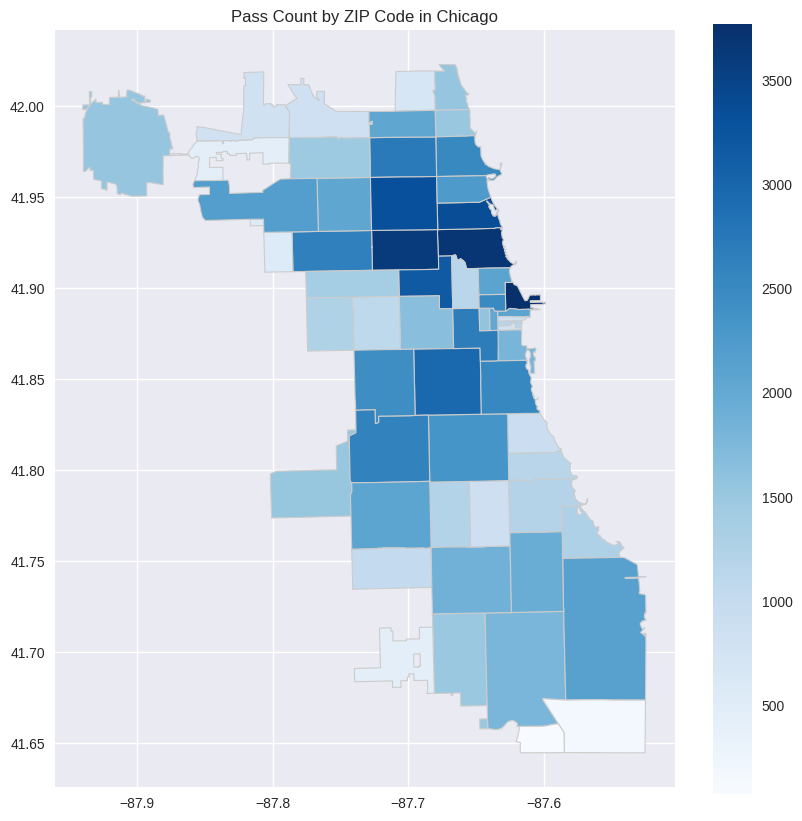

In [95]:
plot_zip_pass_rank(df_dirty)

After data cleaning

In [97]:
get_zip_pass_rank(df_python_cleaned)[0:10]

<ipython-input-93-9373b3fd9731>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_records['Zip'] = pd.to_numeric(pass_records['Zip'], errors='coerce').astype('Int64').astype(str)


,Zip,Pass Count
44,60611,3823
47,60614,3737
78,60647,3691
86,60657,3476
51,60618,3384
55,60622,3282
41,60608,3028
58,60625,2744
40,60607,2724
70,60639,2683


<ipython-input-93-9373b3fd9731>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_records['Zip'] = pd.to_numeric(pass_records['Zip'], errors='coerce').astype('Int64').astype(str)


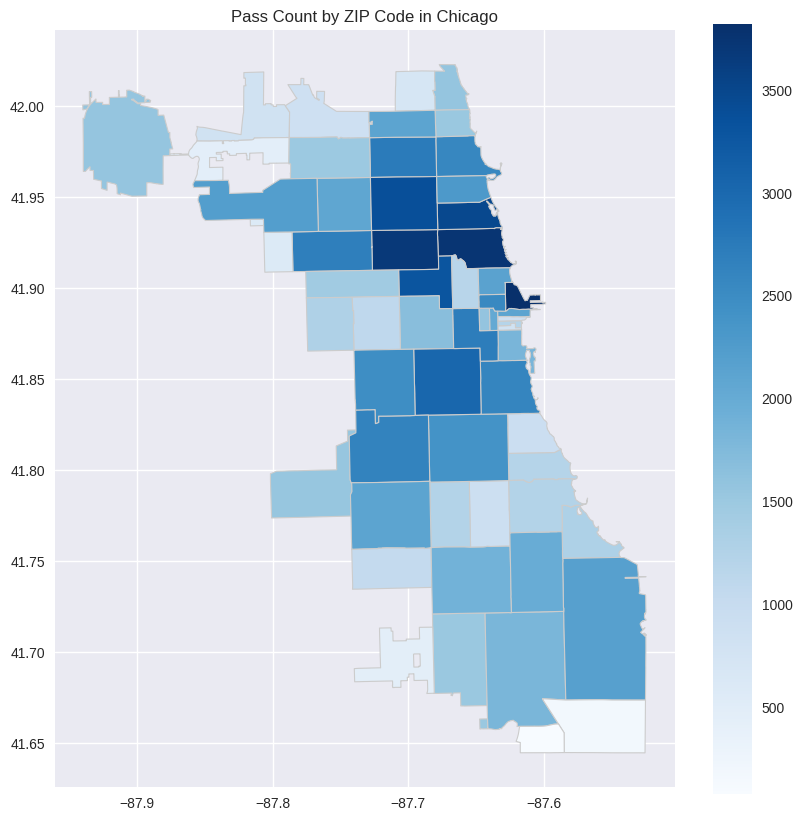

In [98]:
plot_zip_pass_rank(df_python_cleaned)

# U1b - Find out the proportions of Risk Category for Each Facility Type

Check the origal data before cleaning

In [ ]:
# Group by 'Facility Type' and calculate the value counts of 'Risk' column
risk_count_by_facility = df_dirty.groupby('Facility Type')['Risk'].value_counts().unstack(fill_value=0)
risk_count_by_facility.loc['Restaurant']

Risk
All                    4
Risk 1 (High)      80196
Risk 2 (Medium)    20021
Risk 3 (Low)        1006
Name: Restaurant, dtype: int64

In [ ]:
# Group by 'Facility Type' and calculate the value counts of 'Risk' column with proportions
risk_ratio_by_facility = df_dirty.groupby('Facility Type')['Risk'].value_counts(normalize=True).unstack(fill_value=0)
risk_ratio_by_facility.loc['Restaurant']

Risk
All                0.000040
Risk 1 (High)      0.792239
Risk 2 (Medium)    0.197783
Risk 3 (Low)       0.009938
Name: Restaurant, dtype: float64

In [ ]:
# Group by 'Facility Type' and calculate the value counts of 'Risk' column
risk_count_by_facility = df_python_cleaned.groupby('Facility Type')['Risk'].value_counts().unstack(fill_value=0)
risk_count_by_facility.loc['RESTAURANT']

Risk
Risk 1 (High)      80400
Risk 2 (Medium)    20069
Risk 3 (Low)        1544
Name: RESTAURANT, dtype: int64

In [ ]:
# Group by 'Facility Type' and calculate the value counts of 'Risk' column with proportions
risk_ratio_by_facility = df_python_cleaned.groupby('Facility Type')['Risk'].value_counts(normalize=True).unstack(fill_value=0)
risk_ratio_by_facility.loc['RESTAURANT']

Risk
Risk 1 (High)      0.788135
Risk 2 (Medium)    0.196730
Risk 3 (Low)       0.015135
Name: RESTAURANT, dtype: float64

# U1c - Display Yearly Trends of Inspection Results of McDonald's.

In [ ]:
# Select records with Results equal to 'Pass' or 'Pass w/ Conditions' and DBA Name equals to 'MCDONALD'S'
mcdonalds_passed = df_or[(df_or['Results'].isin(['Pass', 'Pass w/ Conditions'])) & (df_or['DBA Name'] == "MCDONALD'S")]

In [ ]:
mcdonalds_passed.groupby('Inspection Year')['Results'].size()

Inspection Year
2010    234
2011    193
2012    185
2013    184
2014    180
2015    173
2016    155
2017     71
Name: Results, dtype: int64

In [ ]:
# Select records with Results equal to 'Pass' or 'Pass w/ Conditions' and DBA Name equals to 'MCDONALD'S'
mcdonalds_passed_cleaned = df_python_cleaned[(df_python_cleaned['Results'].isin(['Pass', 'Pass w/ Conditions'])) & (df_or['DBA Name'] == "MCDONALD'S")]

<ipython-input-213-1066b27e1f7e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mcdonalds_passed_cleaned = df_python_cleaned[(df_python_cleaned['Results'].isin(['Pass', 'Pass w/ Conditions'])) & (df_or['DBA Name'] == "MCDONALD'S")]


In [ ]:
mcdonalds_passed_cleaned.groupby('Inspection Year')['Results'].size()

Inspection Year
2010    150
2011    162
2012    146
2013    155
2014    161
2015    164
2016    147
2017     92
Name: Results, dtype: int64

In [ ]:
import os
import sqlite3
conn = sqlite3.connect('Food_Inspection.db')

conn.execute('DROP TABLE IF EXISTS Table_Dirty')
conn.execute('DROP TABLE IF EXISTS Table_Openrefine')
conn.execute('DROP TABLE IF EXISTS Table_Python')

df_dirty.to_sql('Table_Dirty', con=conn)
df_or.to_sql('Table_Openrefine', con=conn)
df_python_cleaned.to_sql('Table_Python', con=conn)

conn.commit()

In [ ]:
Null_AKA_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "AKA Name" is NULL', conn)
print("The number of tuples with missing/null AKA Name before cleaning: ", len(Null_AKA_Dirty))

Null_AKA_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "AKA Name" is NULL', conn)
print("The number of tuples with missing/null AKA Name after OR cleaning: ", len(Null_AKA_Openrefine))

Null_AKA_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "AKA Name" is NULL', conn)
print("The number of tuples with missing/null AKA Name after Python cleaning: ", len(Null_AKA_Python))

The number of tuples with missing/null AKA Name before cleaning:  2543
The number of tuples with missing/null AKA Name after OR cleaning:  2543
The number of tuples with missing/null AKA Name after Python cleaning:  2145


In [ ]:
Null_License_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "License #" is NULL', conn)
print("The number of tuples with missing/null License # before cleaning: ", len(Null_License_Dirty))

Null_License_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "License #" is NULL', conn)
print("The number of tuples with missing/null License # after OR cleaning: ", len(Null_License_Openrefine))

Null_License_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "License #" is NULL', conn)
print("The number of tuples with missing/null License # after Python cleaning: ", len(Null_License_Python))

The number of tuples with missing/null License # before cleaning:  15
The number of tuples with missing/null License # after OR cleaning:  15
The number of tuples with missing/null License # after Python cleaning:  0


In [ ]:
Null_FacType_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "Facility Type" is NULL', conn)
print("The number of tuples with missing/null Facility Type before cleaning: ", len(Null_FacType_Dirty))

Null_FacType_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "Facility Type" is NULL', conn)
print("The number of tuples with missing/null Facility Type after OR cleaning: ", len(Null_FacType_Openrefine))

Null_FacType_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "Facility Type" is NULL', conn)
print("The number of tuples with missing/null Facility Type after Python cleaning: ", len(Null_FacType_Python))

The number of tuples with missing/null Facility Type before cleaning:  4560
The number of tuples with missing/null Facility Type after OR cleaning:  2802
The number of tuples with missing/null Facility Type after Python cleaning:  0


In [ ]:
Null_Risk_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "Risk" is NULL', conn)
print("The number of tuples with missing/null Risk before cleaning: ", len(Null_Risk_Dirty))

Null_Risk_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "Risk" is NULL', conn)
print("The number of tuples with missing/null Risk after OR cleaning: ", len(Null_Risk_Openrefine))

Null_Risk_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "Risk" is NULL', conn)
print("The number of tuples with missing/null Risk after Python cleaning: ", len(Null_Risk_Python))

The number of tuples with missing/null Risk before cleaning:  66
The number of tuples with missing/null Risk after OR cleaning:  66
The number of tuples with missing/null Risk after Python cleaning:  0


In [ ]:
Null_City_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "City" is NULL', conn)
print("The number of tuples with missing/null City before cleaning: ", len(Null_City_Dirty))

Null_City_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "City" is NULL', conn)
print("The number of tuples with missing/null City after OR cleaning: ", len(Null_City_Openrefine))

Null_City_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "City" is NULL', conn)
print("The number of tuples with missing/null City after Python cleaning: ", len(Null_City_Python))

The number of tuples with missing/null City before cleaning:  159
The number of tuples with missing/null City after OR cleaning:  159
The number of tuples with missing/null City after Python cleaning:  0


In [ ]:
Null_Zip_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "Zip" is NULL', conn)
print("The number of tuples with missing/null Zip before cleaning: ", len(Null_Zip_Dirty))

Null_Zip_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "Zip" is NULL', conn)
print("The number of tuples with missing/null Zip after OR cleaning: ", len(Null_Zip_Openrefine))

Null_Zip_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "Zip" is NULL', conn)
print("The number of tuples with missing/null Zip after Python cleaning: ", len(Null_Zip_Python))

The number of tuples with missing/null Zip before cleaning:  98
The number of tuples with missing/null Zip after OR cleaning:  98
The number of tuples with missing/null Zip after Python cleaning:  0


In [ ]:
Null_InsType_Dirty = pd.read_sql('SELECT * FROM Table_Dirty WHERE "Inspection Type" is NULL', conn)
print("The number of tuples with missing/null Inspection Type before cleaning: ", len(Null_InsType_Dirty))

Null_InsType_Openrefine = pd.read_sql('SELECT * FROM Table_Openrefine WHERE "Inspection Type" is NULL', conn)
print("The number of tuples with missing/null Inspection Type after OR cleaning: ", len(Null_InsType_Openrefine))

Null_InsType_Python = pd.read_sql('SELECT * FROM Table_Python WHERE "Inspection Type" is NULL', conn)
print("The number of tuples with missing/null Inspection Type after Python cleaning: ", len(Null_InsType_Python))

The number of tuples with missing/null Inspection Type before cleaning:  1
The number of tuples with missing/null Inspection Type after OR cleaning:  1
The number of tuples with missing/null Inspection Type after Python cleaning:  0


In [ ]:
McD_spell_check = pd.read_sql('SELECT DISTINCT "DBA Name" FROM Table_Python WHERE "DBA Name" LIKE "%mcdonald%" ', conn)
print("The number of tuples with a DBA Name containing 'mcdonald':\n", McD_spell_check)


The number of tuples with a DBA Name containing 'mcdonald':
                    DBA Name
0                MCDONALD'S
1    HALE FAMILY MCDONALD'S
2     ROCK & ROLL MCDONALDS
3  ERNEST CORP / MCDONALD'S
4     SARAH MCDONALD STEELE


In [ ]:
Longitude_Check1 = pd.read_sql('SELECT * FROM Table_Dirty WHERE CAST(Longitude AS Float) > 180 OR CAST(Longitude AS Float) < -180', conn)
print("The number of tuples with an out-of-range Longitude before cleaning: ", len(Longitude_Check1))

Latitude_Check1 = pd.read_sql('SELECT * FROM Table_Dirty WHERE CAST(Latitude AS Float) > 90 OR CAST(Latitude AS Float) < 0', conn)
print("The number of tuples with an out-of-range Latitude before cleaning: ", len(Longitude_Check1))

Longitude_Check2 = pd.read_sql('SELECT * FROM Table_Openrefine WHERE CAST(Longitude AS Float) > 180 OR CAST(Longitude AS Float) < -180', conn)
print("The number of tuples with an out-of-range Longitude after OR cleaning: ", len(Longitude_Check2))

Latitude_Check2 = pd.read_sql('SELECT * FROM Table_Openrefine WHERE CAST(Latitude AS Float) > 90 OR CAST(Latitude AS Float) < 0', conn)
print("The number of tuples with an out-of-range Latitude after OR cleaning: ", len(Longitude_Check2))

Longitude_Check3 = pd.read_sql('SELECT * FROM Table_Python WHERE CAST(Longitude AS Float) > 180 OR CAST(Longitude AS Float) < -180', conn)
print("The number of tuples with an out-of-range Longitude after Python cleaning: ", len(Longitude_Check3))

Latitude_Check3 = pd.read_sql('SELECT * FROM Table_Python WHERE CAST(Latitude AS Float) > 90 OR CAST(Latitude AS Float) < 0', conn)
print("The number of tuples with an out-of-range Latitude after Python cleaning: ", len(Longitude_Check3))

The number of tuples with an out-of-range Longitude before cleaning:  0
The number of tuples with an out-of-range Latitude before cleaning:  0
The number of tuples with an out-of-range Longitude after OR cleaning:  0
The number of tuples with an out-of-range Latitude after OR cleaning:  0
The number of tuples with an out-of-range Longitude after Python cleaning:  0
The number of tuples with an out-of-range Latitude after Python cleaning:  0


In [ ]:
Inconsis_PWC1 = pd.read_sql("SELECT * FROM Table_Dirty WHERE Violations is NULL AND Results == 'Pass w/ Conditions' ", conn)
print("The number of null violations paired with 'Pass w/ Conditions' before cleaning: ", len(Inconsis_PWC1))

Inconsis_Fail1 = pd.read_sql("SELECT * FROM Table_Dirty WHERE Violations is NULL AND Results == 'Fail' ", conn)
print("The number of null violations paired with 'Fail' before cleaning: ", len(Inconsis_Fail1))

Inconsis_PWC2 = pd.read_sql("SELECT * FROM Table_Openrefine WHERE Violations is NULL AND Results == 'Pass w/ Conditions' ", conn)
print("The number of null violations paired with 'Pass w/ Conditions' after OR cleaning: ", len(Inconsis_PWC2))

Inconsis_Fail2 = pd.read_sql("SELECT * FROM Table_Openrefine WHERE Violations is NULL AND Results == 'Fail' ", conn)
print("The number of null violations paired with 'Fail' after OR cleaning: ", len(Inconsis_Fail2))

Inconsis_PWC3 = pd.read_sql("SELECT * FROM Table_Python WHERE Violations is NULL AND Results == 'Pass w/ Conditions' ", conn)
print("The number of null violations paired with 'Pass w/ Conditions' after Python cleaning: ", len(Inconsis_PWC3))

Inconsis_Fail3 = pd.read_sql("SELECT * FROM Table_Python WHERE Violations is NULL AND Results == 'Fail' ", conn)
print("The number of null violations paired with 'Fail' after Python cleaning: ", len(Inconsis_Fail3))

The number of null violations paired with 'Pass w/ Conditions' before cleaning:  113
The number of null violations paired with 'Fail' before cleaning:  2859
The number of null violations paired with 'Pass w/ Conditions' after OR cleaning:  113
The number of null violations paired with 'Fail' after OR cleaning:  2859
The number of null violations paired with 'Pass w/ Conditions' after Python cleaning:  0
The number of null violations paired with 'Fail' after Python cleaning:  0


In [ ]:
Inconsis_All1 = pd.read_sql("SELECT * FROM Table_Dirty WHERE Risk == 'All' ", conn)
print("The number of tuples having an 'All' risk level before cleaning: ", len(Inconsis_All1))

Inconsis_All2 = pd.read_sql("SELECT * FROM Table_Openrefine WHERE Risk == 'All' ", conn)
print("The number of tuples having an 'All' risk level after OR cleaning: ", len(Inconsis_All1))

Inconsis_All3 = pd.read_sql("SELECT * FROM Table_Python WHERE Risk == 'All' ", conn)
print("The number of tuples having an 'All' risk level after Python cleaning: ", len(Inconsis_All3))

The number of tuples having an 'All' risk level before cleaning:  19
The number of tuples having an 'All' risk level after OR cleaning:  19
The number of tuples having an 'All' risk level after Python cleaning:  0


In [ ]:
NonUni_InsID1 = pd.read_sql('SELECT * FROM Table_Dirty d1, Table_Dirty d2 WHERE d1."Inspection ID" == d2."Inspection ID" AND d1."License #" != d2."License #" ', conn)
print("The number of tuples that have the same Inspection ID with different License # before cleaning: ", len(NonUni_InsID1))

NonUni_InsID2 = pd.read_sql('SELECT * FROM Table_Openrefine o1, Table_Openrefine o2 WHERE o1."Inspection ID" == o2."Inspection ID" AND o1."License #" != o2."License #" ', conn)
print("The number of tuples that have the same Inspection ID with different License # after OR cleaning: ", len(NonUni_InsID2))

NonUni_InsID3 = pd.read_sql('SELECT * FROM Table_Python p1, Table_Python p2 WHERE p1."Inspection ID" == p2."Inspection ID" AND p1."License #" != p2."License #" ', conn)
print("The number of tuples that have the same Inspection ID with different License # after Python cleaning: ", len(NonUni_InsID3))

The number of tuples that have the same Inspection ID with different License # before cleaning:  0
The number of tuples that have the same Inspection ID with different License # after OR cleaning:  0
The number of tuples that have the same Inspection ID with different License # after Python cleaning:  0


In [ ]:
NonUni_License1 = pd.read_sql('SELECT * FROM Table_Dirty d1, Table_Dirty d2 WHERE d1."License #" == d2."License #" AND d1."Address" != d2."Address" ', conn)
print("The number of tuples that have the same License # with different address before cleaning: ", len(NonUni_License1))

NonUni_License2 = pd.read_sql('SELECT * FROM Table_Openrefine o1, Table_Openrefine o2 WHERE o1."License #" == o2."License #" AND o1."Address" != o2."Address" ', conn)
print("The number of tuples that have the same License # with different address after OR cleaning: ", len(NonUni_License2))

NonUni_License3 = pd.read_sql('SELECT * FROM Table_Python p1, Table_Python p2 WHERE p1."License #" == p2."License #" AND p1."Address" != p2."Address" ', conn)
print("The number of tuples that have the same License # with different address after Python cleaning: ", len(NonUni_License3))

The number of tuples that have the same License # with different address before cleaning:  206756
The number of tuples that have the same License # with different address after OR cleaning:  203210
The number of tuples that have the same License # with different address after Python cleaning:  0
